<h1><center>  Case Study -  Bankruptcy </h1></center>

 <h1><center> Taifur Chowdhury </h1></center>




# Business Understanding

**Objective:**

For this case study, our data science team has been asked to build classification models that predict if a company will enter bankruptcy. Our objective is to use two tree-based models - Random Forest and XGBoost - and one non-tree based model to predict bankruptcy accurately.

# Data Evaluation

The finance department provided five separate “.arff” files for five years. Then, the team combined the data into a single data frame. It consists of 64 attributes and 43,405 rows from over 10,000 different companies for five years. The target feature is heavily imbalanced because, from the class variable, only about 5% of the company filed for bankruptcy. 

**Missing data:**

The data has missing values. Our input attributes are formatted as object datatypes since values are all metrics. Based on visual inspection, most of the features in the dataset have missing values. Features like ` net profit / inventory`, ` sales / inventory`, ` profit on operating activities / financial expenses`, ` sales (n) / sales (n-1)`, and ` (current assets - inventories) / long-term liabilities` are the ones with most missing values. One common aspect of all these features is that data are highly skewed. For that reason, the missing values for each feature were imputed using the median. 

**Outliers**

Using an exploratory data analysis package called AUTOVIZ, we notice that most of the input features have outliers with respect to class 0 or `not bankrupt` class. Here are some of the features with large number of outliers:

Attr5: `[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365`

Attr17: `total assets / total liabilities`

Attr25: `(equity - share capital) / total assets`

Attr26: `(net profit + depreciation) / total liabilities`

Attr34: `operating expenses / total liabilities`

Attr57: `(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)`

**Heatmap**

Out of 64 input features, we notice that there are some features that are moderate to highly correlated. The following are some of the pairs that are correlated:

Attr 26 and Attr 34: `26 - (net profit + depreciation) / total liabilities` and `34 - operating expenses / total liabilities` features are correlated relatively to some of the other features pairs.

Attr 26 and Attr 17: `26 - (net profit + depreciation) / total liabilities` and `17 - total assets / total liabilities` features are correlated relatively to some of the other features pairs.

Attr 62 and Attr 56: `62 - (short-term liabilities *365) / sales` and `56 - (sales - cost of products sold) / sales` features have scored the highest in terms of correlation value and both are negatively correlated. 

**Assumptions:**

Given the imbalanced output feature, we believe most companies will not be bankrupt. However, if some companies go bankrupt, we know from the feature importance that companies with these attributes are likely to file for bankruptcy.

In [41]:
# Import Libraries

import numpy as np
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import time
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import RandomForestClassifier as rf
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif
# to select the features
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn import metrics as mt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import det_curve
from sklearn.metrics import classification_report
from mlxtend.evaluate import accuracy_score
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [2]:
# Define dataframe

df = pd.read_csv('complete_dataset.csv')

In [3]:
#Dataframe Dimension 
df.shape

(43405, 65)

In [4]:
# Dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43397 non-null  float64
 1   Attr2   43397 non-null  float64
 2   Attr3   43397 non-null  float64
 3   Attr4   43271 non-null  float64
 4   Attr5   43316 non-null  float64
 5   Attr6   43397 non-null  float64
 6   Attr7   43397 non-null  float64
 7   Attr8   43311 non-null  float64
 8   Attr9   43396 non-null  float64
 9   Attr10  43397 non-null  float64
 10  Attr11  43361 non-null  float64
 11  Attr12  43271 non-null  float64
 12  Attr13  43278 non-null  float64
 13  Attr14  43397 non-null  float64
 14  Attr15  43369 non-null  float64
 15  Attr16  43310 non-null  float64
 16  Attr17  43311 non-null  float64
 17  Attr18  43397 non-null  float64
 18  Attr19  43277 non-null  float64
 19  Attr20  43278 non-null  float64
 20  Attr21  37551 non-null  float64
 21  Attr22  43397 non-null  float64
 22

**Checking for missing values**

In [5]:
#Checking for null values in all the features

print(df.isnull().sum())

Attr1       8
Attr2       8
Attr3       8
Attr4     134
Attr5      89
         ... 
Attr61    102
Attr62    127
Attr63    134
Attr64    812
class       0
Length: 65, dtype: int64


### EDA and Visualization

Shape of your Data Set loaded: (43405, 65)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  64
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    64 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Binary_Classification VISUALIZATION Started #####################
Number of variables = 64 exceeds limit, finding top 30 variables through XGBoost
    No categorical feature reduction done. All 0 Categorical vars selected 
    Removing correlated variables fr

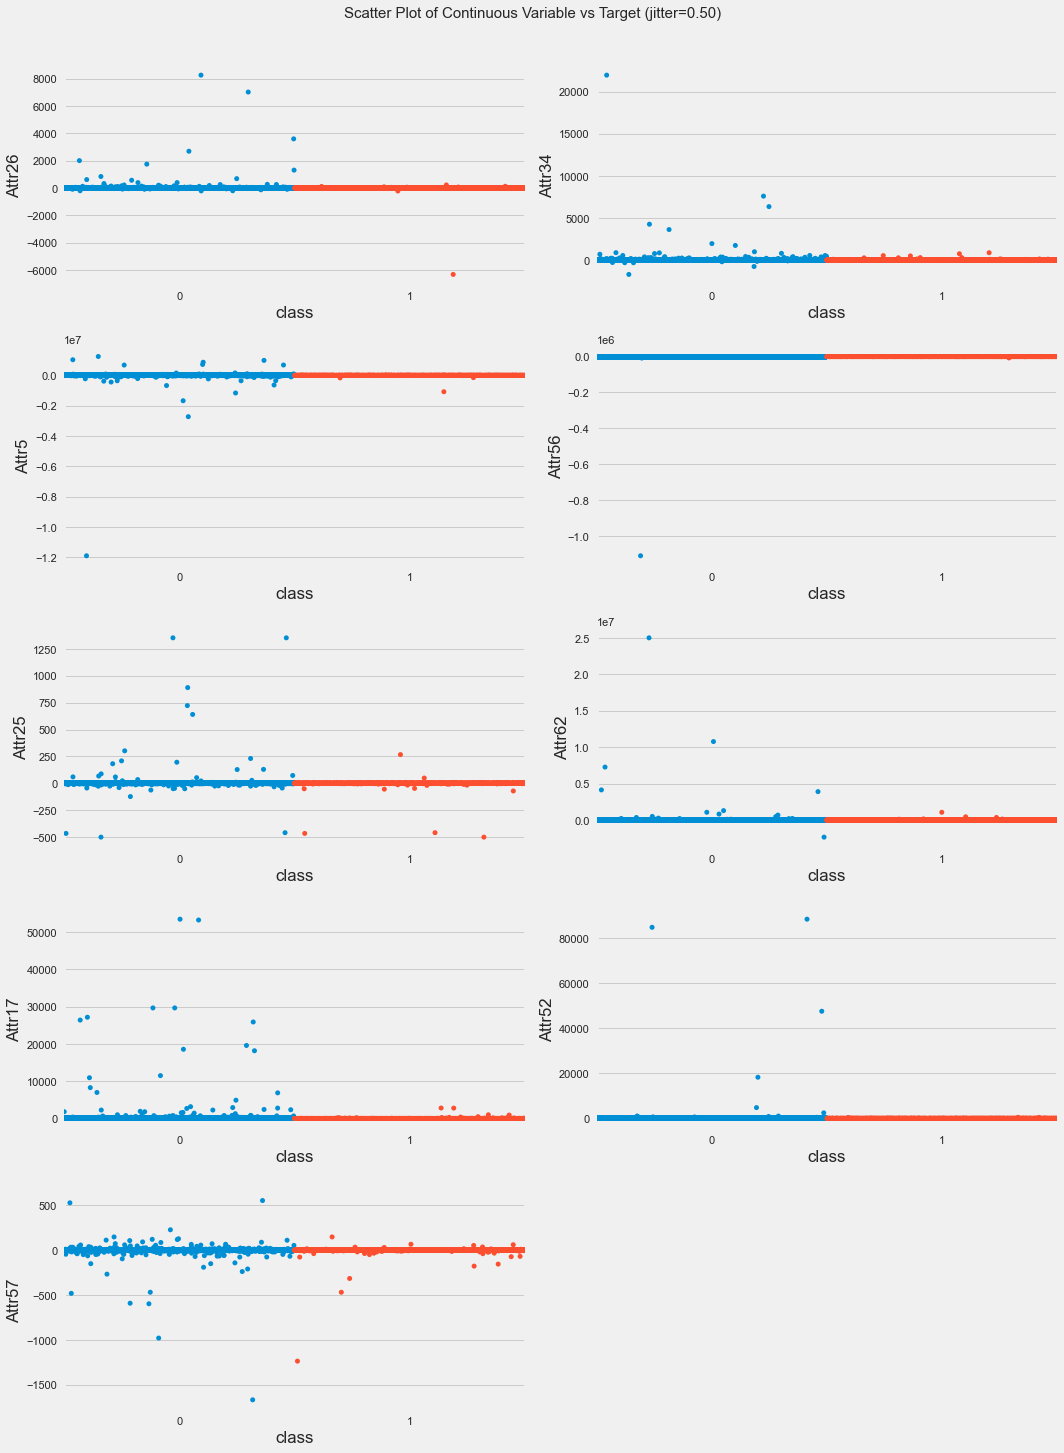

Total Number of Scatter Plots = 45


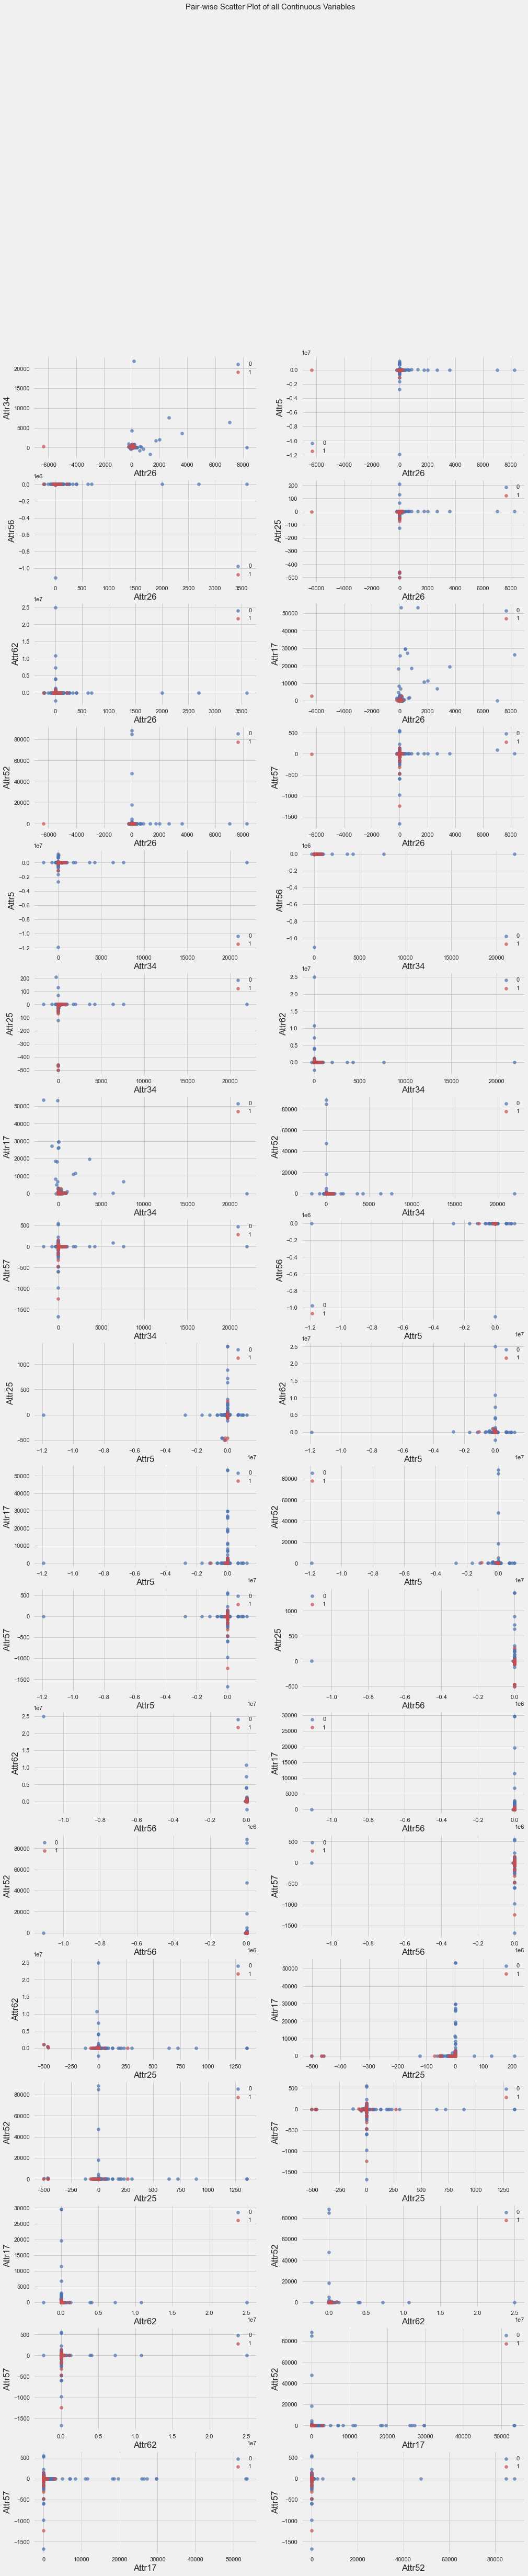

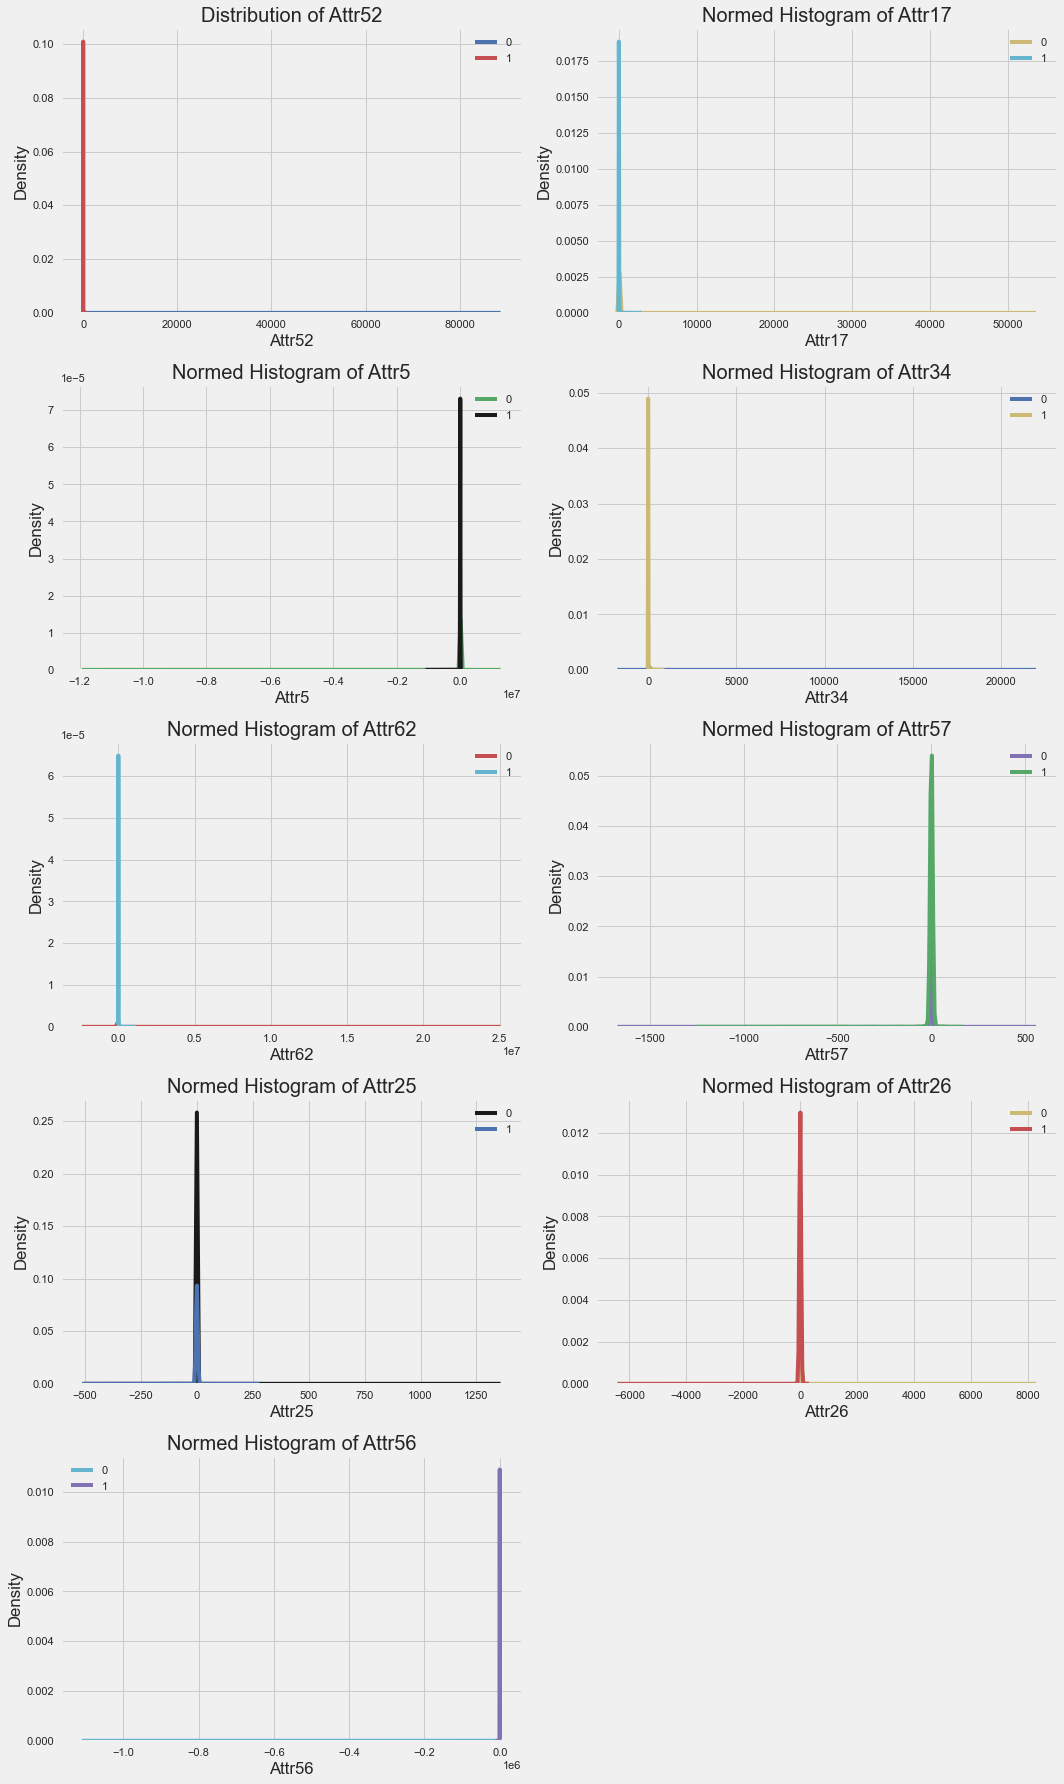

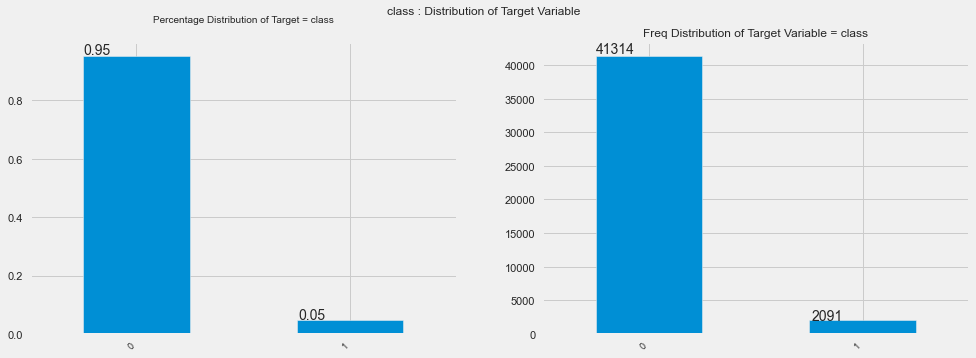

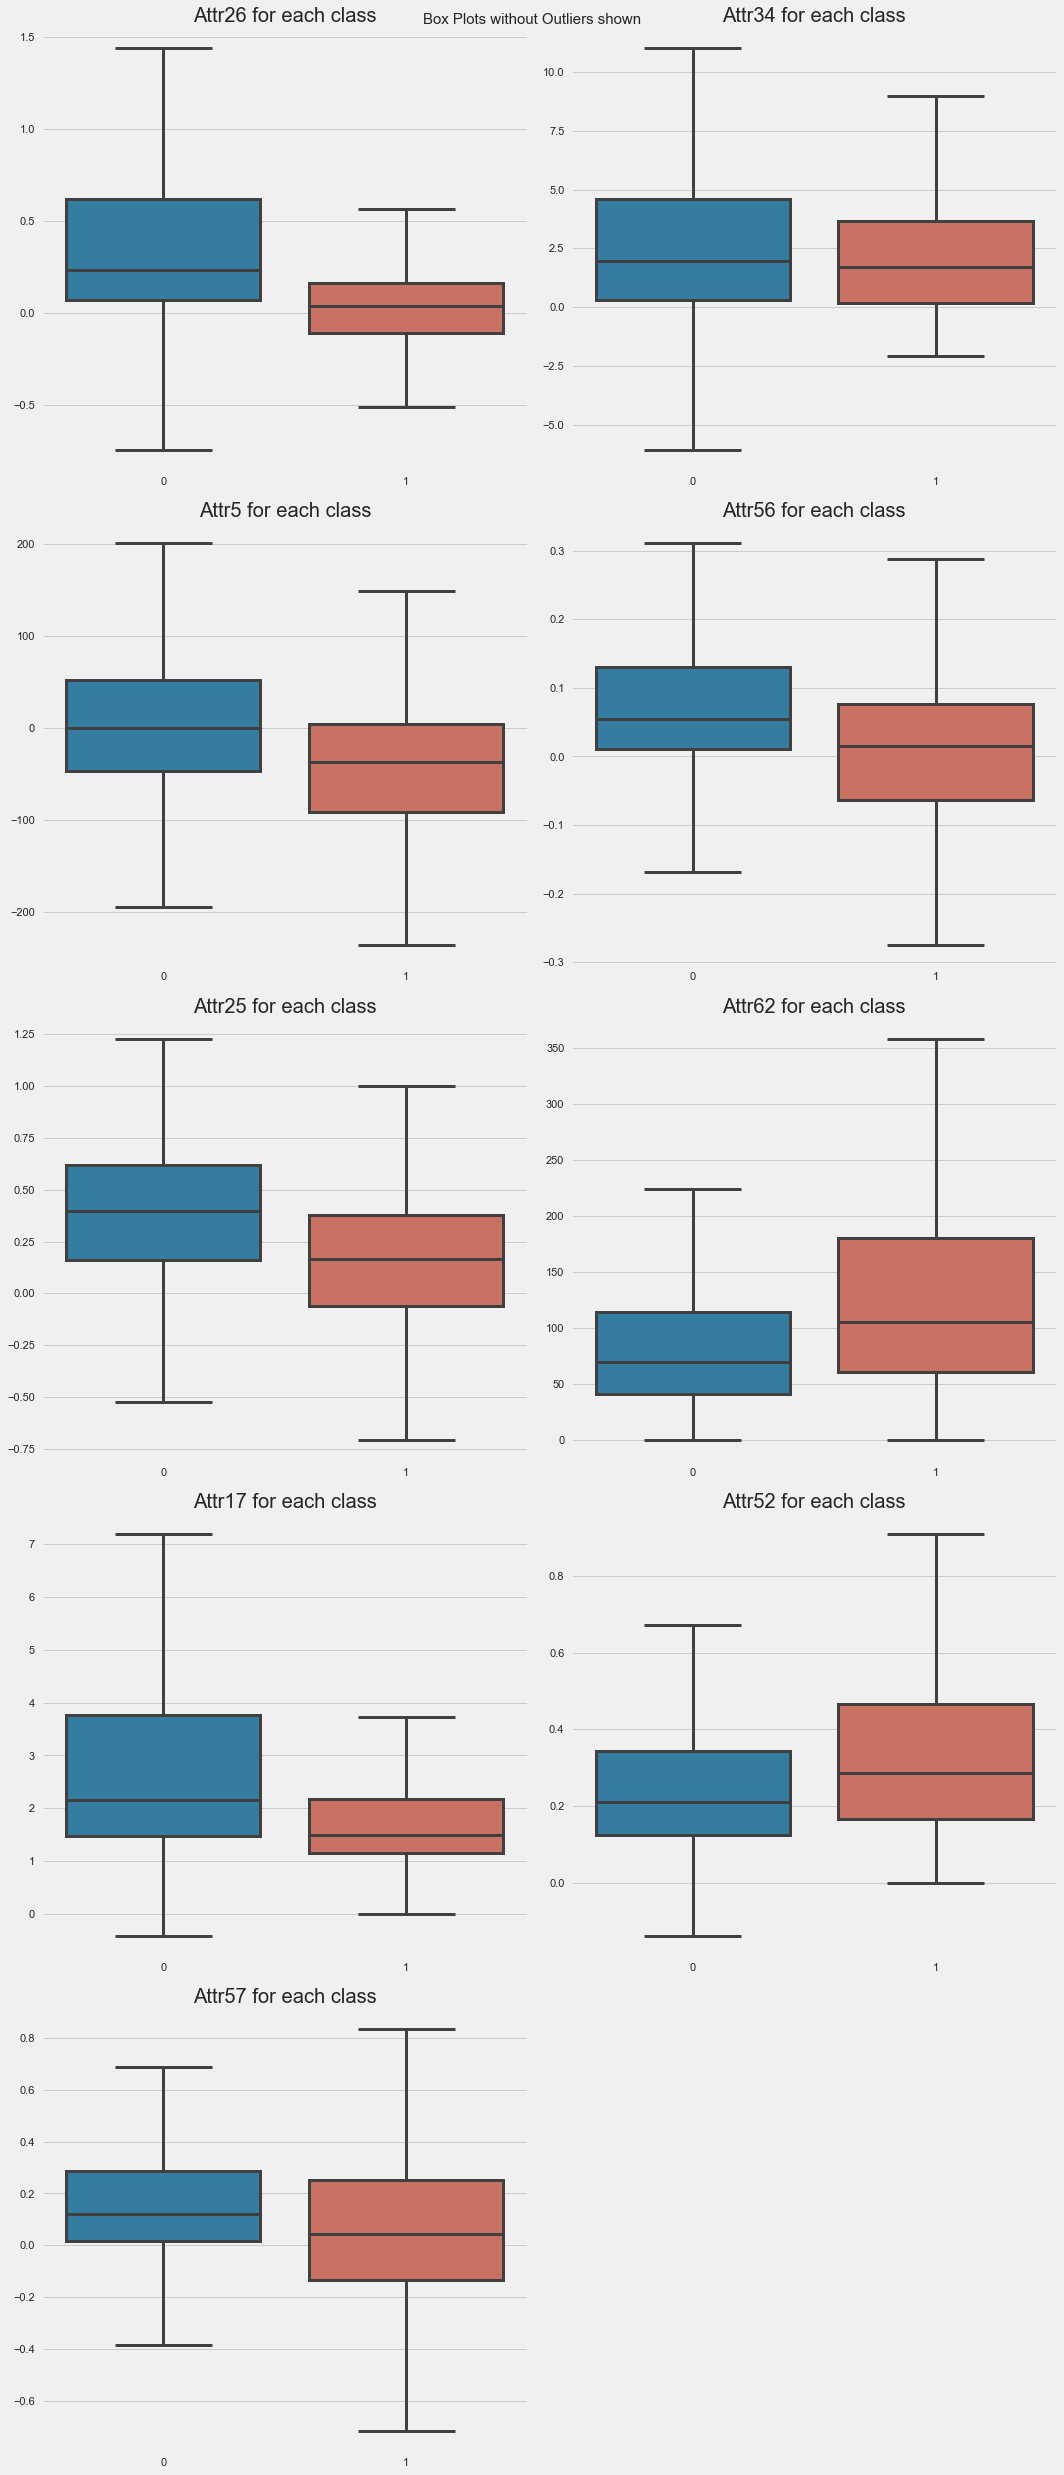

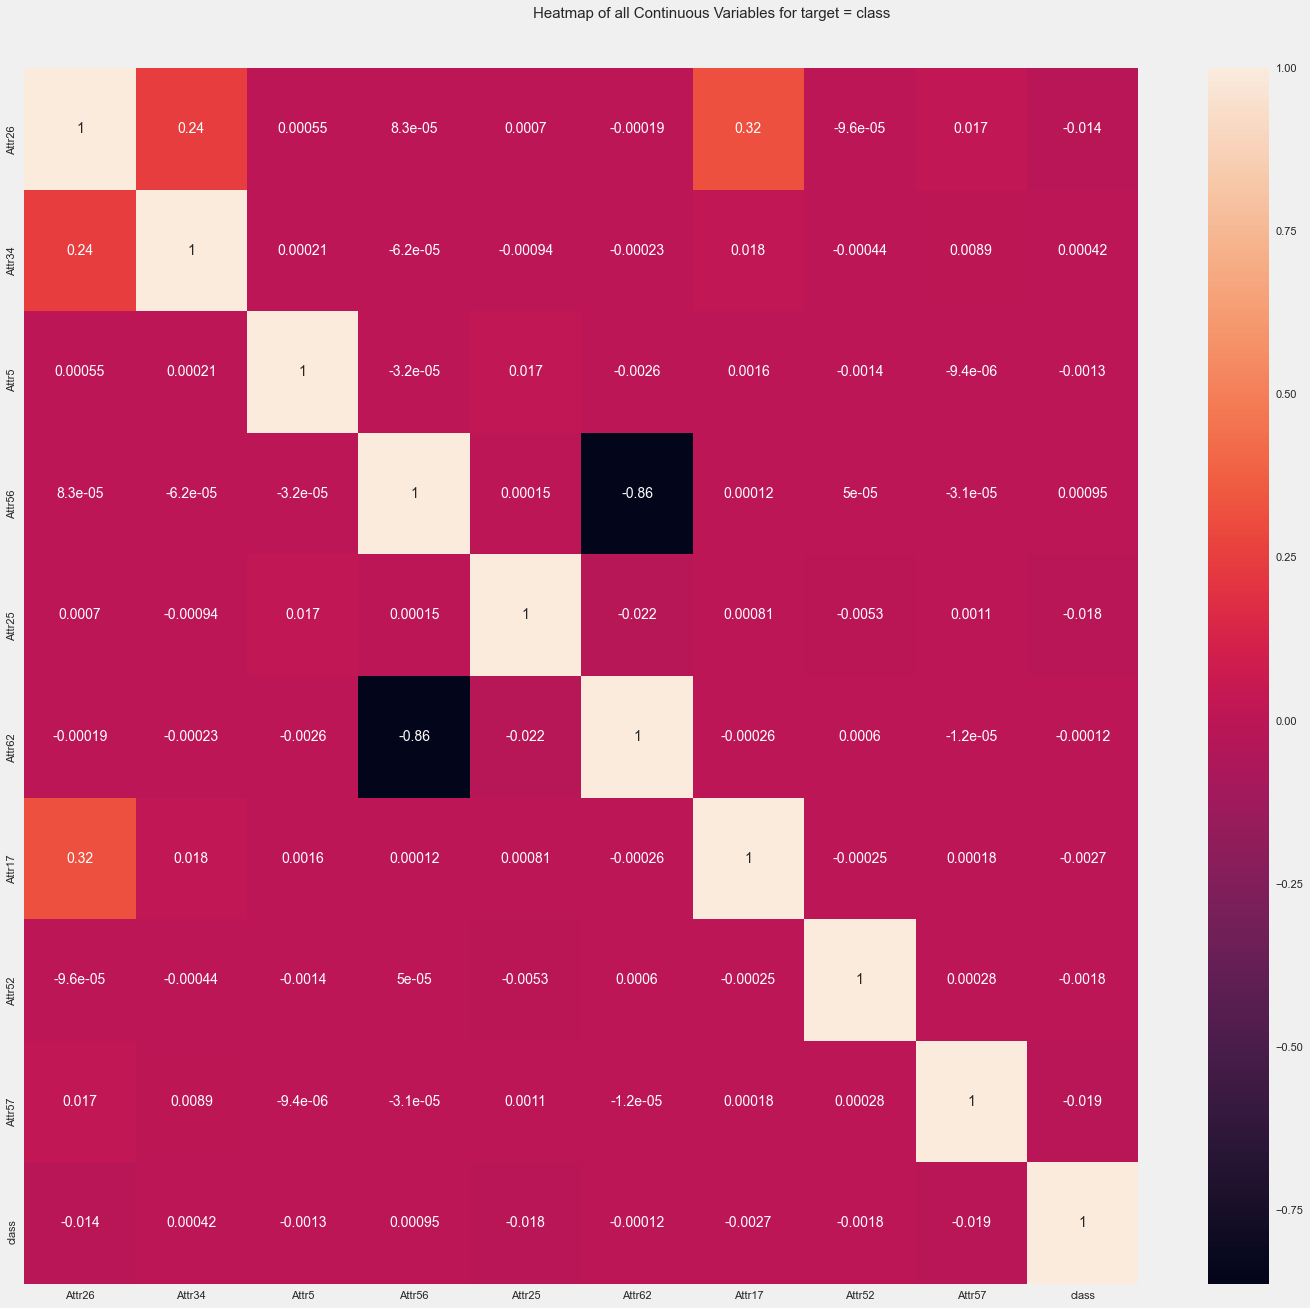

No categorical or boolean vars in data set. Hence no pivot plots...
No categorical or numeric vars in data set. Hence no bar charts.
Time to run AutoViz = 25 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [24]:
# AutoViz For EDA: Small subset

import pandas as pd
import numpy as np
from autoviz.AutoViz_Class import AutoViz_Class
import warnings
warnings.filterwarnings("ignore")
AV = AutoViz_Class()
df.sample_viz = AV.AutoViz('complete_dataset.csv', verbose = 1, depVar = 'class',chart_format="jpg")

In [6]:
# Replace null values with median values due presence of skewed features

column_median = df.median()
df = df.fillna(column_median)

In [7]:
# Making sure there is no missing value
print(df.isnull().sum())

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
         ..
Attr61    0
Attr62    0
Attr63    0
Attr64    0
class     0
Length: 65, dtype: int64


0    0.951826
1    0.048174
Name: class, dtype: float64

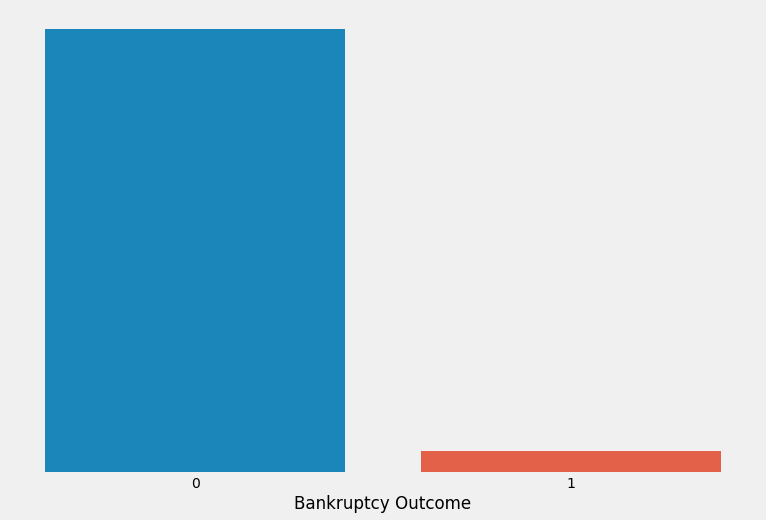

In [9]:
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')
sns.countplot(df['class'])
plt.xlabel('Bankruptcy Outcome')
plt.ylabel('')
plt.yticks([])
df['class'].value_counts(normalize=True)

# Modeling Preparations:

In this section, we have decided to keep all the features for model building since all the input features are performance metrics that helps to decide whether companies will go bankrupt or not.

Define Input and Output for Modeling:

In [38]:
#Define Input and Output

y = df['class']
X = df.loc[:, df.columns!='class']
print(X.shape)
print(y.shape)

(43405, 64)
(43405,)


In [39]:
# Separate train and test sets and Scales input dataframes 

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

#Scale Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [42]:
#Create Cross Validation Procedure
cv = StratifiedKFold(n_splits=10, random_state=1234, shuffle=True)

# Model Building

The primary goal of this study is to build two tree-based models - Random Forest and an XGBoost - and a non tree-based model to predict bankruptcy accurately. The target variable for this dataset is the “class” variable for which the sub-class group is “0” which is companies not going bankrupt, and “1” for companies going bankrupt. As seen from the EDA process, 95% of the target response are companies that are not going bankrupt, while 5% are companies that are likely to go bankrupt. We used StratefiedShuffleSplit cross-validation technique because of the imbalanced target variable. This cross validation technique incorporates the imbalanced nature of the target variable so then the models are trained effectively.  

We have scaled our training and test datasets for our non-tree based model. We have not scaled the tree-based models because those type of models are no sensitive to the variance in data. Also, we did not scaled all the input features (X) together because we would like to avoid the data leakage issue during model training.

We have built our models using GridsearchCV function from sklearn's model selection package. The functions have used  predefined hyperparameters to build all the models and have produced scores based on the model performance. Using `.best_params_`, the function provides us the best set of parameters that have produced the best score for each of the the three model which are listed below:

**Random Forest:**

Best Parameters - 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 150

Score - 0.9601 or 96.01%

**XGBoost:**

Best Parameters - 'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 70, 'subsample': 0.5

Score - 0.9604 or 96.04%

**SGDClassifier:**

Best Parameters - 'alpha': 0.1, 'loss': 'hinge', 'penalty': 'l2'

Score - 0.9511 or 95.11%

From the scores above, we notice that XGBoost model has performed the best which we have used for our final model building. 

<br><br>

Source: https://towardsdatascience.com/do-decision-trees-need-feature-scaling-97809eaa60c6#:~:text=Decision%20trees%20and%20ensemble%20methods%20do%20not%20require%20feature%20scaling,the%20variance%20in%20the%20data.

Source : https://intellipaat.com/community/49696/which-machine-learning-algorithms-require-feature-scaling#:~:text=The%20Machine%20Learning%20algorithms%20that%20require%20the%20feature%20scaling%20are,Linear%20Regression%2C%20and%20Logistic%20Regression.

#### Random Forest

In [43]:
import time
import pandas as pd 
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit
import warnings
warnings.filterwarnings("ignore")

# Number of trees in random forest
n_estimators = [30, 70, 100, 150]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# Defining the criterion
criterion = ['gini', 'entropy']

param_rf = { 
    'n_estimators': n_estimators,
    'max_features': max_features,
    'criterion': criterion 
}

rf = RandomForestClassifier()

rf_clf = GridSearchCV(rf, param_grid = param_rf, cv = cv, verbose= 2)

rf_clf.fit(X_train, y_train)

rf_predicted = rf_clf.predict(X_test)

rf_report = classification_report(y_test, rf_predicted)

print(rf_clf.best_params_)

print(rf_clf.best_score_)

%time

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV] END .criterion=gini, max_features=auto, n_estimators=30; total time=   5.4s
[CV] END .criterion=gini, max_features=auto, n_estimators=30; total time=   5.2s
[CV] END .criterion=gini, max_features=auto, n_estimators=30; total time=   5.3s
[CV] END .criterion=gini, max_features=auto, n_estimators=30; total time=   5.2s
[CV] END .criterion=gini, max_features=auto, n_estimators=30; total time=   5.3s
[CV] END .criterion=gini, max_features=auto, n_estimators=30; total time=   5.3s
[CV] END .criterion=gini, max_features=auto, n_estimators=30; total time=   5.6s
[CV] END .criterion=gini, max_features=auto, n_estimators=30; total time=   5.4s
[CV] END .criterion=gini, max_features=auto, n_estimators=30; total time=   5.2s
[CV] END .criterion=gini, max_features=auto, n_estimators=30; total time=   5.3s
[CV] END .criterion=gini, max_features=auto, n_estimators=70; total time=  12.7s
[CV] END .criterion=gini, max_features=auto, n

[CV] END criterion=gini, max_features=log2, n_estimators=100; total time=  13.2s
[CV] END criterion=gini, max_features=log2, n_estimators=100; total time=  13.5s
[CV] END criterion=gini, max_features=log2, n_estimators=100; total time=  13.2s
[CV] END criterion=gini, max_features=log2, n_estimators=100; total time=  13.6s
[CV] END criterion=gini, max_features=log2, n_estimators=100; total time=  13.4s
[CV] END criterion=gini, max_features=log2, n_estimators=100; total time=  13.5s
[CV] END criterion=gini, max_features=log2, n_estimators=100; total time=  13.8s
[CV] END criterion=gini, max_features=log2, n_estimators=100; total time=  13.4s
[CV] END criterion=gini, max_features=log2, n_estimators=100; total time=  13.6s
[CV] END criterion=gini, max_features=log2, n_estimators=150; total time=  20.6s
[CV] END criterion=gini, max_features=log2, n_estimators=150; total time=  19.7s
[CV] END criterion=gini, max_features=log2, n_estimators=150; total time=  20.5s
[CV] END criterion=gini, max

[CV] END criterion=entropy, max_features=log2, n_estimators=30; total time=   3.7s
[CV] END criterion=entropy, max_features=log2, n_estimators=30; total time=   3.7s
[CV] END criterion=entropy, max_features=log2, n_estimators=30; total time=   3.7s
[CV] END criterion=entropy, max_features=log2, n_estimators=30; total time=   3.7s
[CV] END criterion=entropy, max_features=log2, n_estimators=30; total time=   3.8s
[CV] END criterion=entropy, max_features=log2, n_estimators=30; total time=   3.7s
[CV] END criterion=entropy, max_features=log2, n_estimators=30; total time=   3.7s
[CV] END criterion=entropy, max_features=log2, n_estimators=30; total time=   3.8s
[CV] END criterion=entropy, max_features=log2, n_estimators=30; total time=   3.7s
[CV] END criterion=entropy, max_features=log2, n_estimators=30; total time=   3.7s
[CV] END criterion=entropy, max_features=log2, n_estimators=70; total time=   8.8s
[CV] END criterion=entropy, max_features=log2, n_estimators=70; total time=   8.6s
[CV]

### XGBoost Model Building

In [31]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

# Number of trees in random forest
n_estimators = [30, 70, 100, 150]

# Number of features to consider at every split
subsample = [0.2, 0.5, 0.8]

# Defining the criterion
max_depth = [5, 10, 20]

#Learning Rate
learning_rate = [0.01, 0.1, .5, 1]

param_xgb = { 
    'n_estimators': n_estimators,
    'subsample': subsample,
    'max_depth': max_depth,
    'learning_rate' : learning_rate
}

xgb = XGBClassifier()

xgb_clf = GridSearchCV(xgb, param_grid = param_xgb, cv = cv, verbose= 2)

xgb_clf.fit(X_train, y_train)

xgb_predicted = xgb_clf.predict(X_test)

print(xgb_clf.best_params_)

print(xgb_clf.best_score_)

%time

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[13:46:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.01, max_depth=5, n_estimators=30, subsample=0.2; total time=   0.3s
[13:46:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.01, max_depth=5, n_estimators=30, subsample=0.2; total time=   0.3s
[13:46:46] WARNING: /opt/conc

[CV] END learning_rate=0.01, max_depth=5, n_estimators=70, subsample=0.2; total time=   0.6s
[13:46:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.01, max_depth=5, n_estimators=70, subsample=0.2; total time=   0.6s
[13:46:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.01, max_depth=5, n_estimators=70, subsample=0.5; total time=   1.1s

[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5; total time=   1.6s
[13:47:16] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5; total time=   1.5s
[13:47:18] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5; total time=   1

[CV] END learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.8; total time=   2.7s
[13:47:52] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.8; total time=   2.6s
[13:47:55] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.8; total time=   2

[CV] END learning_rate=0.01, max_depth=10, n_estimators=70, subsample=0.2; total time=   1.1s
[13:48:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.01, max_depth=10, n_estimators=70, subsample=0.2; total time=   1.1s
[13:48:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.01, max_depth=10, n_estimators=70, subsample=0.2; total time=   1

[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.2; total time=   1.7s
[13:48:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.2; total time=   1.7s
[13:48:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.01, max_depth=10, n_estimators=100, subsample=0.5; total time= 

[CV] END learning_rate=0.01, max_depth=10, n_estimators=150, subsample=0.5; total time=   4.1s
[13:49:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.01, max_depth=10, n_estimators=150, subsample=0.5; total time=   4.2s
[13:49:46] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.01, max_depth=10, n_estimators=150, subsample=0.5; total time= 

[CV] END learning_rate=0.01, max_depth=20, n_estimators=30, subsample=0.5; total time=   1.1s
[13:50:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.01, max_depth=20, n_estimators=30, subsample=0.8; total time=   1.6s
[13:50:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.01, max_depth=20, n_estimators=30, subsample=0.8; total time=   1

[CV] END learning_rate=0.01, max_depth=20, n_estimators=70, subsample=0.8; total time=   3.2s
[13:51:10] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.01, max_depth=20, n_estimators=70, subsample=0.8; total time=   3.3s
[13:51:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.01, max_depth=20, n_estimators=100, subsample=0.2; total time=   

[CV] END learning_rate=0.01, max_depth=20, n_estimators=150, subsample=0.2; total time=   2.9s
[13:52:10] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.01, max_depth=20, n_estimators=150, subsample=0.2; total time=   2.9s
[13:52:13] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.01, max_depth=20, n_estimators=150, subsample=0.2; total time= 

[CV] END learning_rate=0.1, max_depth=5, n_estimators=30, subsample=0.2; total time=   0.3s
[13:53:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=5, n_estimators=30, subsample=0.5; total time=   0.5s
[13:53:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=5, n_estimators=30, subsample=0.5; total time=   0.5s
[1

[CV] END learning_rate=0.1, max_depth=5, n_estimators=70, subsample=0.5; total time=   1.1s
[13:53:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=5, n_estimators=70, subsample=0.5; total time=   1.1s
[13:53:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=5, n_estimators=70, subsample=0.8; total time=   1.4s
[1

[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   1.9s
[13:54:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   1.9s
[13:54:11] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   1.9s

[CV] END learning_rate=0.1, max_depth=10, n_estimators=30, subsample=0.2; total time=   0.5s
[13:54:47] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=10, n_estimators=30, subsample=0.2; total time=   0.5s
[13:54:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=10, n_estimators=30, subsample=0.2; total time=   0.5s

[CV] END learning_rate=0.1, max_depth=10, n_estimators=70, subsample=0.5; total time=   2.0s
[13:55:07] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=10, n_estimators=70, subsample=0.5; total time=   2.0s
[13:55:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=10, n_estimators=70, subsample=0.5; total time=   2.0s

[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.5; total time=   2.9s
[13:55:50] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   3.7s
[13:55:54] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=10, n_estimators=100, subsample=0.8; total time=   3

[CV] END learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.8; total time=   6.0s
[13:57:06] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=10, n_estimators=150, subsample=0.8; total time=   6.0s
[13:57:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=20, n_estimators=30, subsample=0.2; total time=   0.

[CV] END learning_rate=0.1, max_depth=20, n_estimators=70, subsample=0.2; total time=   1.5s
[13:57:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=20, n_estimators=70, subsample=0.2; total time=   1.5s
[13:57:37] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=20, n_estimators=70, subsample=0.2; total time=   1.5s

[CV] END learning_rate=0.1, max_depth=20, n_estimators=100, subsample=0.5; total time=   3.9s
[13:58:30] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=20, n_estimators=100, subsample=0.5; total time=   4.0s
[13:58:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=20, n_estimators=100, subsample=0.5; total time=   4

[CV] END learning_rate=0.1, max_depth=20, n_estimators=150, subsample=0.8; total time=   7.9s
[14:00:04] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=20, n_estimators=150, subsample=0.8; total time=   7.9s
[14:00:12] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.1, max_depth=20, n_estimators=150, subsample=0.8; total time=   7

[CV] END learning_rate=0.5, max_depth=5, n_estimators=30, subsample=0.8; total time=   0.6s
[14:00:42] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=5, n_estimators=70, subsample=0.2; total time=   0.7s
[14:00:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=5, n_estimators=70, subsample=0.2; total time=   0.7s
[1

[CV] END learning_rate=0.5, max_depth=5, n_estimators=100, subsample=0.2; total time=   1.0s
[14:01:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=5, n_estimators=100, subsample=0.2; total time=   1.0s
[14:01:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=5, n_estimators=100, subsample=0.5; total time=   1.7s

[CV] END learning_rate=0.5, max_depth=5, n_estimators=150, subsample=0.5; total time=   2.5s
[14:01:36] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=5, n_estimators=150, subsample=0.5; total time=   2.4s
[14:01:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=5, n_estimators=150, subsample=0.5; total time=   2.5s

[CV] END learning_rate=0.5, max_depth=10, n_estimators=30, subsample=0.8; total time=   1.2s
[14:02:05] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=10, n_estimators=30, subsample=0.8; total time=   1.2s
[14:02:06] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=10, n_estimators=30, subsample=0.8; total time=   1.2s

[CV] END learning_rate=0.5, max_depth=10, n_estimators=100, subsample=0.2; total time=   1.6s
[14:02:39] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=10, n_estimators=100, subsample=0.2; total time=   1.6s
[14:02:40] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=10, n_estimators=100, subsample=0.2; total time=   1

[CV] END learning_rate=0.5, max_depth=10, n_estimators=150, subsample=0.2; total time=   2.4s
[14:03:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=10, n_estimators=150, subsample=0.5; total time=   3.8s
[14:03:33] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=10, n_estimators=150, subsample=0.5; total time=   3

[CV] END learning_rate=0.5, max_depth=20, n_estimators=30, subsample=0.5; total time=   1.2s
[14:04:21] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=20, n_estimators=30, subsample=0.5; total time=   1.2s
[14:04:23] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=20, n_estimators=30, subsample=0.8; total time=   1.6s

[CV] END learning_rate=0.5, max_depth=20, n_estimators=70, subsample=0.8; total time=   3.7s
[14:04:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=20, n_estimators=70, subsample=0.8; total time=   3.4s
[14:05:03] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=20, n_estimators=70, subsample=0.8; total time=   3.2s

[CV] END learning_rate=0.5, max_depth=20, n_estimators=150, subsample=0.2; total time=   2.8s
[14:05:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=20, n_estimators=150, subsample=0.2; total time=   2.9s
[14:06:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=0.5, max_depth=20, n_estimators=150, subsample=0.2; total time=   2

[CV] END learning_rate=1, max_depth=5, n_estimators=30, subsample=0.5; total time=   0.5s
[14:07:01] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=1, max_depth=5, n_estimators=30, subsample=0.5; total time=   0.5s
[14:07:02] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=1, max_depth=5, n_estimators=30, subsample=0.5; total time=   0.5s
[14:07:0

[CV] END learning_rate=1, max_depth=5, n_estimators=70, subsample=0.5; total time=   1.2s
[14:07:15] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=1, max_depth=5, n_estimators=70, subsample=0.8; total time=   1.4s
[14:07:17] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=1, max_depth=5, n_estimators=70, subsample=0.8; total time=   1.4s
[14:07:1

[CV] END learning_rate=1, max_depth=5, n_estimators=100, subsample=0.8; total time=   2.0s
[14:07:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=1, max_depth=5, n_estimators=100, subsample=0.8; total time=   2.0s
[14:07:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=1, max_depth=5, n_estimators=150, subsample=0.2; total time=   1.4s
[14:0

[CV] END learning_rate=1, max_depth=10, n_estimators=30, subsample=0.2; total time=   0.5s
[14:08:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=1, max_depth=10, n_estimators=30, subsample=0.2; total time=   0.5s
[14:08:22] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=1, max_depth=10, n_estimators=30, subsample=0.2; total time=   0.5s
[14:0

[CV] END learning_rate=1, max_depth=10, n_estimators=70, subsample=0.5; total time=   2.2s
[14:08:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=1, max_depth=10, n_estimators=70, subsample=0.5; total time=   2.0s
[14:08:45] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=1, max_depth=10, n_estimators=70, subsample=0.5; total time=   1.9s
[14:0

[CV] END learning_rate=1, max_depth=10, n_estimators=100, subsample=0.8; total time=   3.2s
[14:09:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=1, max_depth=10, n_estimators=100, subsample=0.8; total time=   3.2s
[14:09:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=1, max_depth=10, n_estimators=100, subsample=0.8; total time=   3.5s
[1

[CV] END learning_rate=1, max_depth=10, n_estimators=150, subsample=0.8; total time=   4.3s
[14:10:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=1, max_depth=20, n_estimators=30, subsample=0.2; total time=   0.6s
[14:10:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=1, max_depth=20, n_estimators=30, subsample=0.2; total time=   0.8s
[14:

[CV] END learning_rate=1, max_depth=20, n_estimators=70, subsample=0.2; total time=   1.2s
[14:10:48] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=1, max_depth=20, n_estimators=70, subsample=0.2; total time=   1.2s
[14:10:49] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=1, max_depth=20, n_estimators=70, subsample=0.5; total time=   2.2s
[14:1

[CV] END learning_rate=1, max_depth=20, n_estimators=100, subsample=0.5; total time=   2.7s
[14:11:28] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=1, max_depth=20, n_estimators=100, subsample=0.5; total time=   2.7s
[14:11:31] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=1, max_depth=20, n_estimators=100, subsample=0.5; total time=   2.8s
[1

[CV] END learning_rate=1, max_depth=20, n_estimators=150, subsample=0.8; total time=   4.3s
[14:12:29] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=1, max_depth=20, n_estimators=150, subsample=0.8; total time=   5.0s
[14:12:34] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV] END learning_rate=1, max_depth=20, n_estimators=150, subsample=0.8; total time=   4.4s
[1

### SGDClassifier

Feature Scaling for SGDClassifier

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
# GridsearchCV Search for SGDClassifier Model
import time
from sklearn.linear_model import SGDClassifier

params = {
    "loss" : ["hinge", "log", "squared_hinge"],
    "alpha" : [0.001, 0.1, 1],
    "penalty" : ["l2", "l1", "none"],
}

model = SGDClassifier(max_iter=1000)
clf2 = GridSearchCV(model, param_grid = params, cv = cv, verbose= 2)
clf2.fit(X_train, y_train)
predicted = clf2.predict(X_test)

print(clf2.best_params_)

print(clf2.best_score_)

%time

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV] END ................alpha=0.001, loss=hinge, penalty=l2; total time=   0.1s
[CV] END ................alpha=0.001, loss=hinge, penalty=l2; total time=   0.1s
[CV] END ................alpha=0.001, loss=hinge, penalty=l2; total time=   0.1s
[CV] END ................alpha=0.001, loss=hinge, penalty=l2; total time=   0.1s
[CV] END ................alpha=0.001, loss=hinge, penalty=l2; total time=   0.1s
[CV] END ................alpha=0.001, loss=hinge, penalty=l2; total time=   0.1s
[CV] END ................alpha=0.001, loss=hinge, penalty=l2; total time=   0.1s
[CV] END ................alpha=0.001, loss=hinge, penalty=l2; total time=   0.0s
[CV] END ................alpha=0.001, loss=hinge, penalty=l2; total time=   0.1s
[CV] END ................alpha=0.001, loss=hinge, penalty=l2; total time=   0.1s
[CV] END ................alpha=0.001, loss=hinge, penalty=l1; total time=   0.2s
[CV] END ................alpha=0.001, loss=hin

[CV] END ..................alpha=0.1, loss=hinge, penalty=l1; total time=   0.0s
[CV] END ..................alpha=0.1, loss=hinge, penalty=l1; total time=   0.0s
[CV] END ..................alpha=0.1, loss=hinge, penalty=l1; total time=   0.0s
[CV] END ..................alpha=0.1, loss=hinge, penalty=l1; total time=   0.0s
[CV] END ..................alpha=0.1, loss=hinge, penalty=l1; total time=   0.0s
[CV] END ..................alpha=0.1, loss=hinge, penalty=l1; total time=   0.0s
[CV] END ..................alpha=0.1, loss=hinge, penalty=l1; total time=   0.1s
[CV] END ..................alpha=0.1, loss=hinge, penalty=l1; total time=   0.0s
[CV] END ................alpha=0.1, loss=hinge, penalty=none; total time=   0.0s
[CV] END ................alpha=0.1, loss=hinge, penalty=none; total time=   0.0s
[CV] END ................alpha=0.1, loss=hinge, penalty=none; total time=   0.1s
[CV] END ................alpha=0.1, loss=hinge, penalty=none; total time=   0.0s
[CV] END ................alp

[CV] END ..................alpha=1, loss=hinge, penalty=none; total time=   0.0s
[CV] END ..................alpha=1, loss=hinge, penalty=none; total time=   0.0s
[CV] END ..................alpha=1, loss=hinge, penalty=none; total time=   0.0s
[CV] END ..................alpha=1, loss=hinge, penalty=none; total time=   0.0s
[CV] END ..................alpha=1, loss=hinge, penalty=none; total time=   0.0s
[CV] END ..................alpha=1, loss=hinge, penalty=none; total time=   0.0s
[CV] END ......................alpha=1, loss=log, penalty=l2; total time=   0.1s
[CV] END ......................alpha=1, loss=log, penalty=l2; total time=   0.1s
[CV] END ......................alpha=1, loss=log, penalty=l2; total time=   0.1s
[CV] END ......................alpha=1, loss=log, penalty=l2; total time=   0.1s
[CV] END ......................alpha=1, loss=log, penalty=l2; total time=   0.1s
[CV] END ......................alpha=1, loss=log, penalty=l2; total time=   0.1s
[CV] END ...................

# Model Interpretation

We have build and intepreted our final model using XGBoost. We picked this model since it has performed the best in terms of accuracy score. Using `plot_importance` function XGBoost package, we can notice the top features that explain and interpret the model our of 20 features that have been selected for overall model building. Using 1000 F1-score as threshold, the following features are top 5 features of the model: 

**F19** - X46 - (current assets - inventory) / short-term liabilities

**F13** - X27 - profit on operating activities / financial expenses

**F10** - X24 - gross profit (in 3 years) / total assets

**F11** - X25 - (equity - share capital) / total assets

**F18** - X41 - total liabilities / ((profit on operating activities + depreciation) * (12/365))

These top five features indicate that profitability figures and asset valuation in 3 year time range can be crucial for determining whether a company goes bankrupt or not. 

[12:33:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


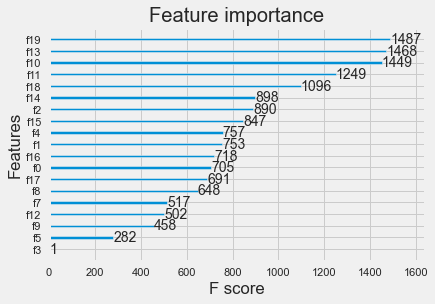

In [48]:
#Final XGBoost Model
from xgboost import plot_importance
from matplotlib import pyplot
final_xgb = XGBClassifier(learning_rate = 0.1, max_depth = 20, n_estimators = 70, subsample = 0.5)
final_xgb.fit(X_train, y_train)
xgb_predicted = final_xgb.predict(X_test)
# plot feature importance
plot_importance(final_xgb)
pyplot.show()

# Conclusion



The XGBoost model displays the best performance by tuning to improve the accuracy score. We recommend this model using the following hyperparameters settings:

learning_rate = .01

max_depth = 20

subsample = .5

n_estimators = 70

As per classification report stated below, the model produces an accuracy score of 96%. The scores that are more important to observe are the precision score and recall score for class `0 - Not Bankrupt` and class `1 - Bankrupt`. It is important because data is imbalanced for both of those class - 95% Class '0' vs 0.05% Class '1'. Class 0 has higher precision and recall scores than class 1. Class 1 scores can be important to look at because it deals with and predicts companies which are going to be bankrupt. It has scored a precision score of 80% which means we have correctly predicted this class 80% of the time. The recall rate for this class is 30% which means our model has identified 30% of the bankrupt companies. Recall rate indicates we have high number of false `1 - Bankrupt` classifiers and may need further improvement with hyper parameter tuning. With additional new data in future the models need to be retrained and validated for updated results and score improvements. 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     12416
           1       0.80      0.30      0.43       606

    accuracy                           0.96     13022
   macro avg       0.88      0.65      0.71     13022
weighted avg       0.96      0.96      0.96     13022



<AxesSubplot:>

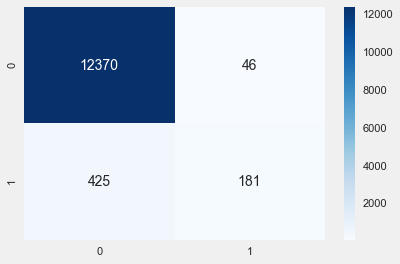

In [46]:
print(classification_report(y_test, xgb_predicted))
final_matrix = confusion_matrix(y_test, xgb_predicted)
sns.heatmap(final_matrix, annot=True, fmt='d',cmap="Blues")